In [7]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt


In [8]:

# Parameters
m = 1.0          # mass of pendulum (kg)
R = 1.0          # length of rod (m)
g = 9.81         # gravitational acceleration (m/s^2)
b = 0.1          # damping coefficient (kg·m^2/s)
A = 0.5          # driving torque amplitude (N·m)
k = 2.0          # driving angular frequency (rad/s)

# Initial conditions
theta0 = 0.1     # initial angle (rad)
omega0 = 0.0     # initial angular velocity (rad/s)
y0 = [theta0, omega0]

# Time span
t0, tf = 0.0, 20.0
t_eval = np.linspace(t0, tf, 1000)

def driven_damped_pendulum(t, y):
    theta, omega = y
    dtheta_dt = omega
    domega_dt = - (g / R) * np.sin(theta) \
                + (-b * omega + A * np.cos(k * t)) / (m * R**2)
    return [dtheta_dt, domega_dt]


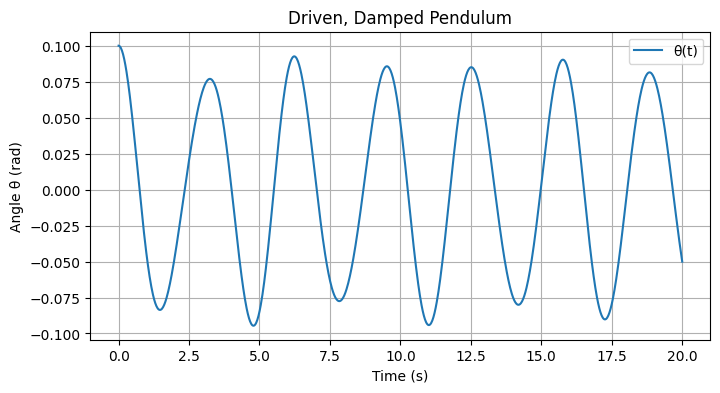

In [9]:
# Solve the ODE
sol = solve_ivp(
    fun=driven_damped_pendulum,
    t_span=(t0, tf),
    y0=y0,
    t_eval=t_eval,
    method='RK45'
)

# (Optional) Plotting
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(sol.t, sol.y[0], label='θ(t)')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Angle θ (rad)')
ax.set_title('Driven, Damped Pendulum')
ax.legend()
ax.grid(True)
plt.show()

https://www.myphysicslab.com/pendulum/chaotic-pendulum-en.html 